In [2]:
import sys
sys.path.append("../")

import math
import torch
import torch_geometric as pyg
import numpy as np
from models.LASE_unshared_normalized import LASE
from models.RDPG_GD import RDPG_GD_Armijo, coordinate_descent
from models.SVD_truncate import embed_scipy
from torch_geometric.utils import to_dense_adj
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from training.get_init import get_x_init
from models.SVD_truncate import align_Xs

# SBM-3

Loss LASE shared weights (5 layers):  tensor(4295.8354)
Loss RDPG SVD Truncate:  4497.6577


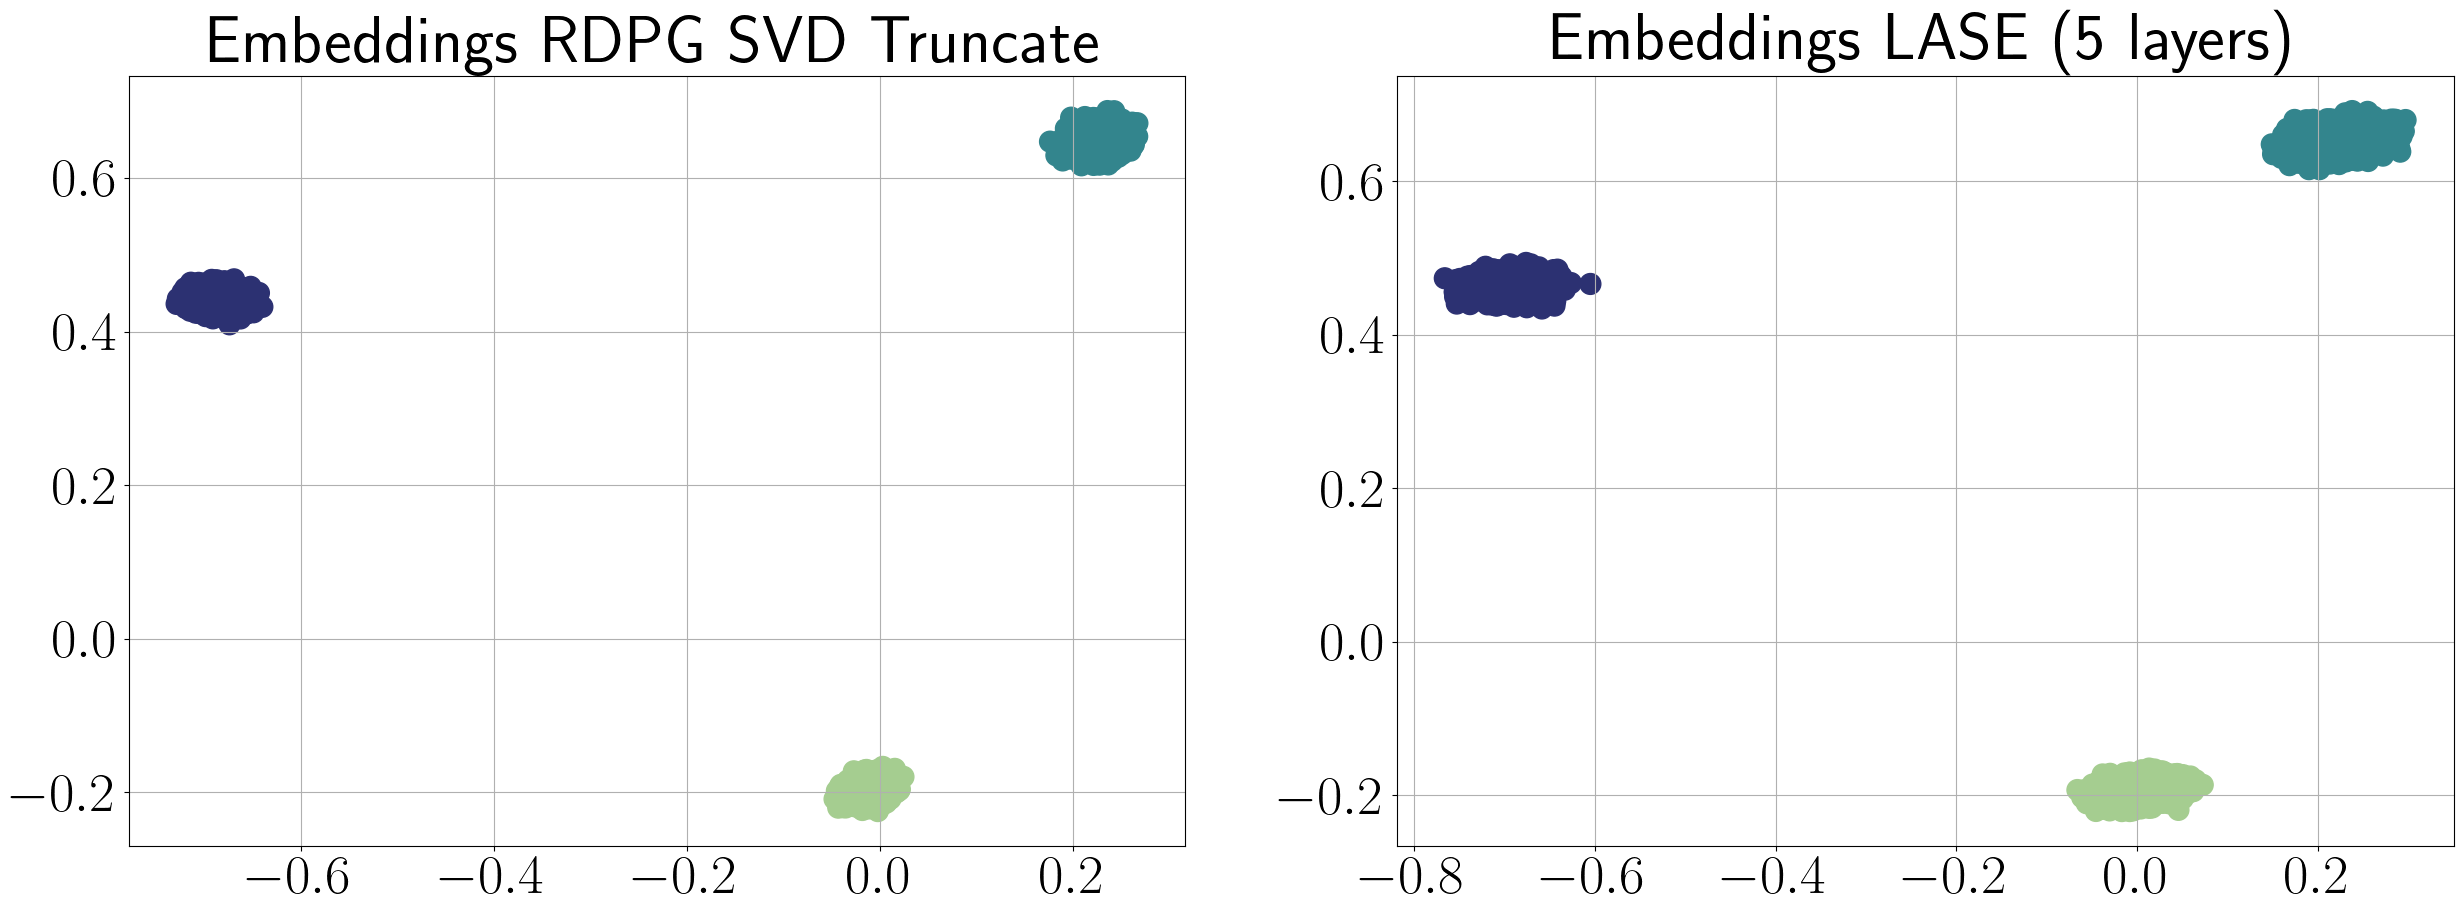

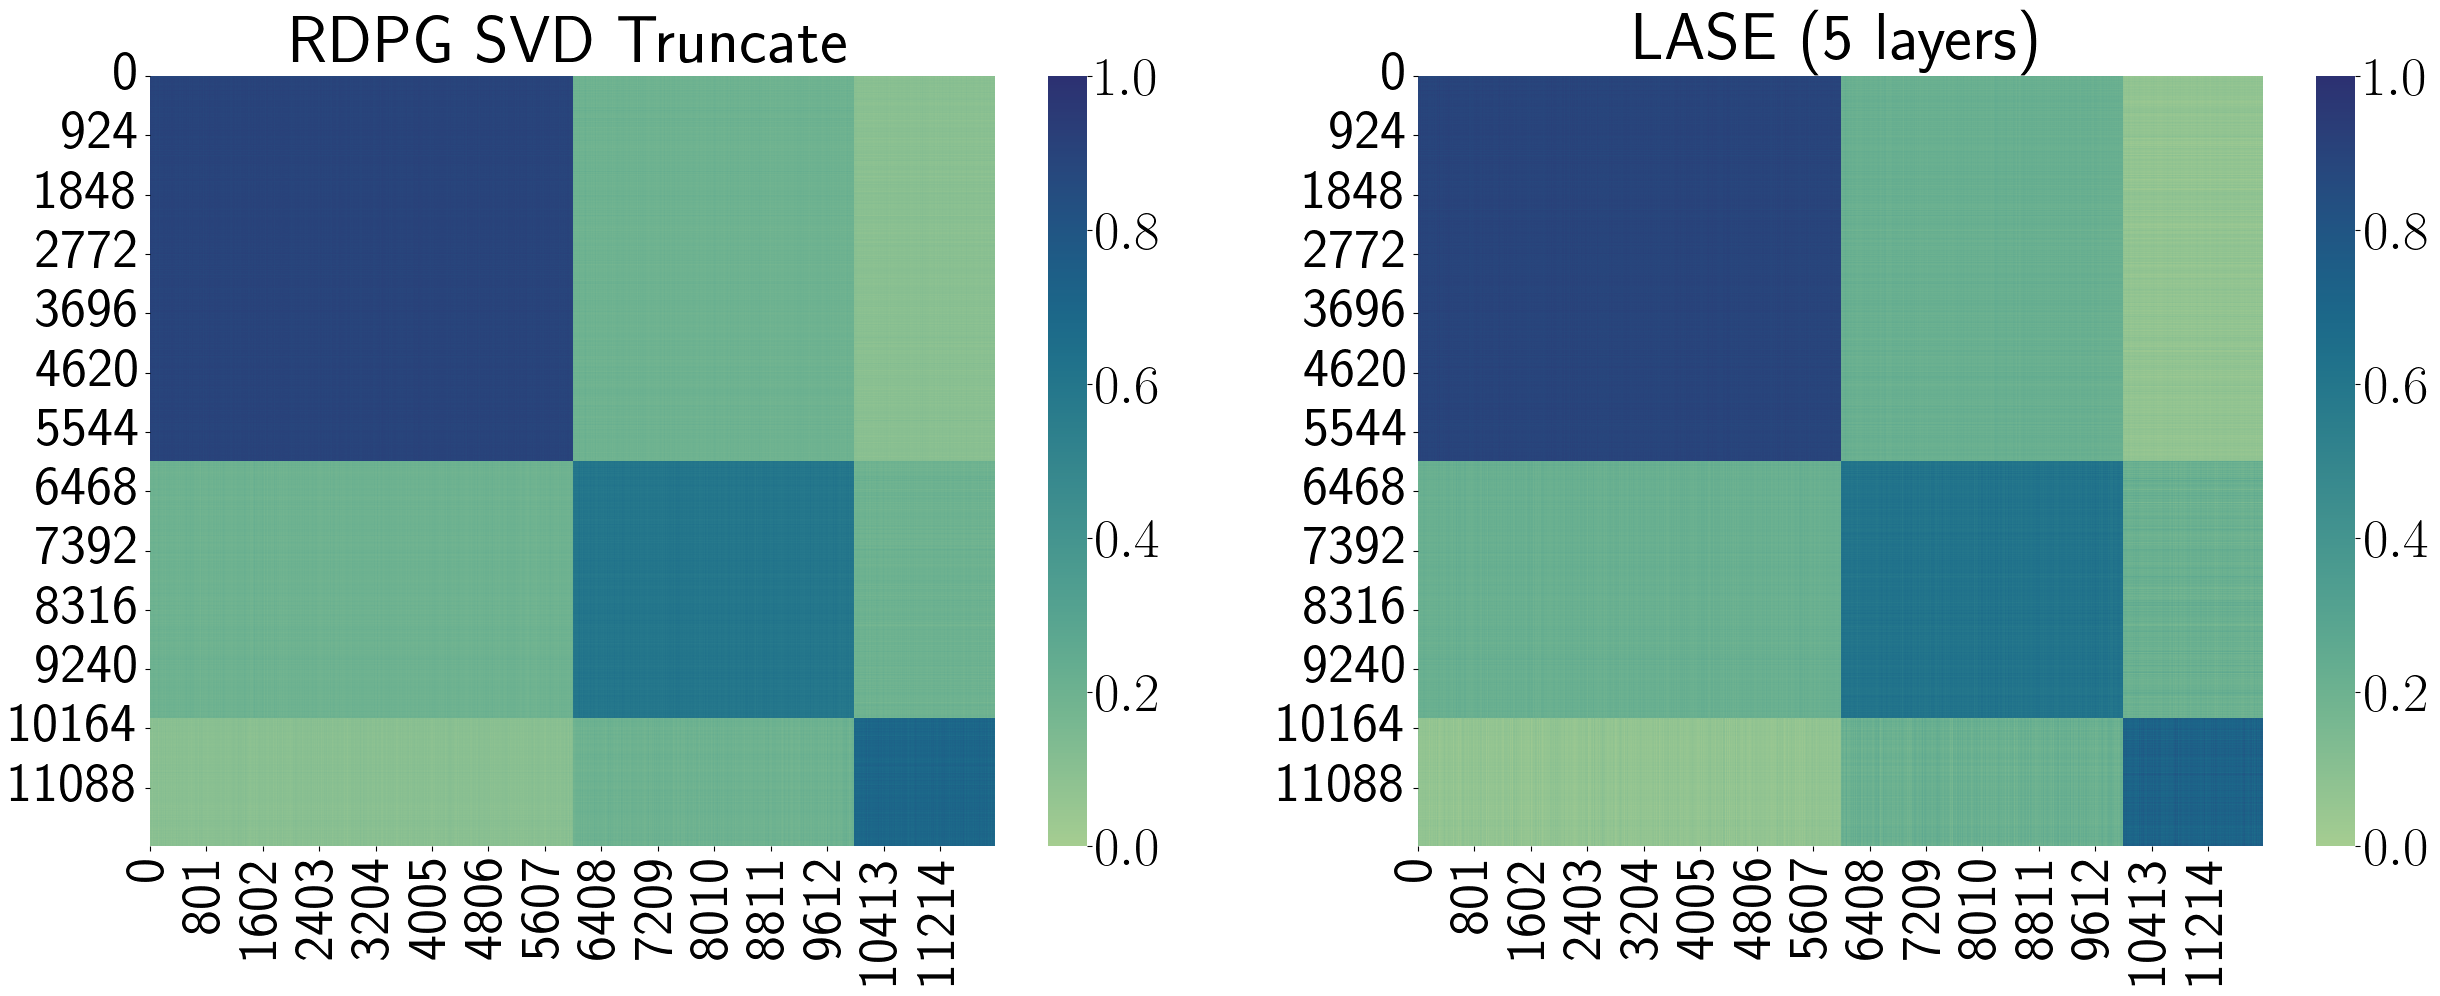

In [6]:
torch.manual_seed(42)

plt.rcParams['lines.linewidth'] = 3
plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 40
plt.rcParams['lines.markersize'] = 15
plt.rcParams['axes.grid'] = False

d = 3
gd_steps = 5
device = 'cpu'


lase = LASE(d, d, gd_steps)
lase.load_state_dict(torch.load('../saved_models/lase_unshared_d3_normalized_unbalanced_subgraphs_rand.pt'))
lase.to(device)
lase.eval()

ORIGINAL_GRAPH = '../data/sbm3_unbalanced_positive_original_graph_095.pkl'
with open(ORIGINAL_GRAPH, 'rb') as f:
    data= pickle.load(f)

num_nodes = data.num_nodes
edge_index = data.edge_index
edge_index_2 = torch.ones([num_nodes,num_nodes],).nonzero().t().contiguous().to(device)
mask = (torch.ones([num_nodes,num_nodes],)-torch.eye(num_nodes)).nonzero().t().contiguous().to(device)
# x  = get_x_init(num_nodes, d, 0, math.pi/2, 0, math.pi/2).to(device)
x = torch.rand((num_nodes, d)).to(device)

x_lase = lase(x, edge_index, edge_index_2, mask)
x_lase = x_lase.detach()
loss = torch.norm((x_lase@x_lase.T - to_dense_adj(edge_index).squeeze(0))*to_dense_adj(mask).squeeze(0))
print(f"Loss LASE shared weights ({gd_steps} layers): ", loss)
x_lase = x_lase.to('cpu')

# x_gd, cost_gd, iter = RDPG_GD_Armijo(x, edge_index, mask)
# x_gd = x_gd.to('cpu')
# loss = torch.norm((x_gd@x_gd.T - to_dense_adj(edge_index).squeeze(0))*to_dense_adj(mask).squeeze(0))
# print("Loss RDPG GD Armijo: ", loss)
# print("Armijo iterations: ", iter)

x_svd = embed_scipy(edge_index,d)
loss = np.linalg.norm((x_svd@x_svd.T - to_dense_adj(edge_index).squeeze(0).numpy())*to_dense_adj(mask).squeeze(0))
print("Loss RDPG SVD Truncate: ", loss)

# x_cgd = coordinate_descent(edge_index, mask, d)
# loss = np.linalg.norm((x_cgd@x_cgd.T - to_dense_adj(edge_index).squeeze(0).numpy())*to_dense_adj(mask).squeeze(0))
# print("Loss Coordinate Gradient Descent: ", loss)

n = [6000, 4000, 2000]
colors = np.concatenate((np.ones(n[0]),np.ones(n[1])*2,np.ones(n[2])*3))


x_lase_p = align_Xs(x_lase,x_svd)

plt.rcParams['axes.grid'] = True
fig, axes = plt.subplots(1, 2, figsize =(30,10))
axes[0].set_title('Embeddings RDPG SVD Truncate')
axes[0].scatter(x_svd[:,0],x_svd[:,1], c=colors, cmap="crest")
axes[1].set_title(f'Embeddings LASE ({gd_steps} layers)')
axes[1].scatter(x_lase_p[:,0],x_lase_p[:,1], c=colors, cmap="crest")

plt.show()

plt.rcParams['axes.grid'] = False
fig, axes = plt.subplots(1, 2, figsize =(30,10))
axes[0].set_title('RDPG SVD Truncate')
sns.heatmap(x_svd@x_svd.T, ax=axes[0], vmin=0.0, vmax=1.0, cbar=True, cmap="crest")
axes[1].set_title(f'LASE ({gd_steps} layers)')
sns.heatmap(x_lase@x_lase.T, ax=axes[1], vmin=0.0, vmax=1.0, cbar=True, cmap="crest")

plt.show()



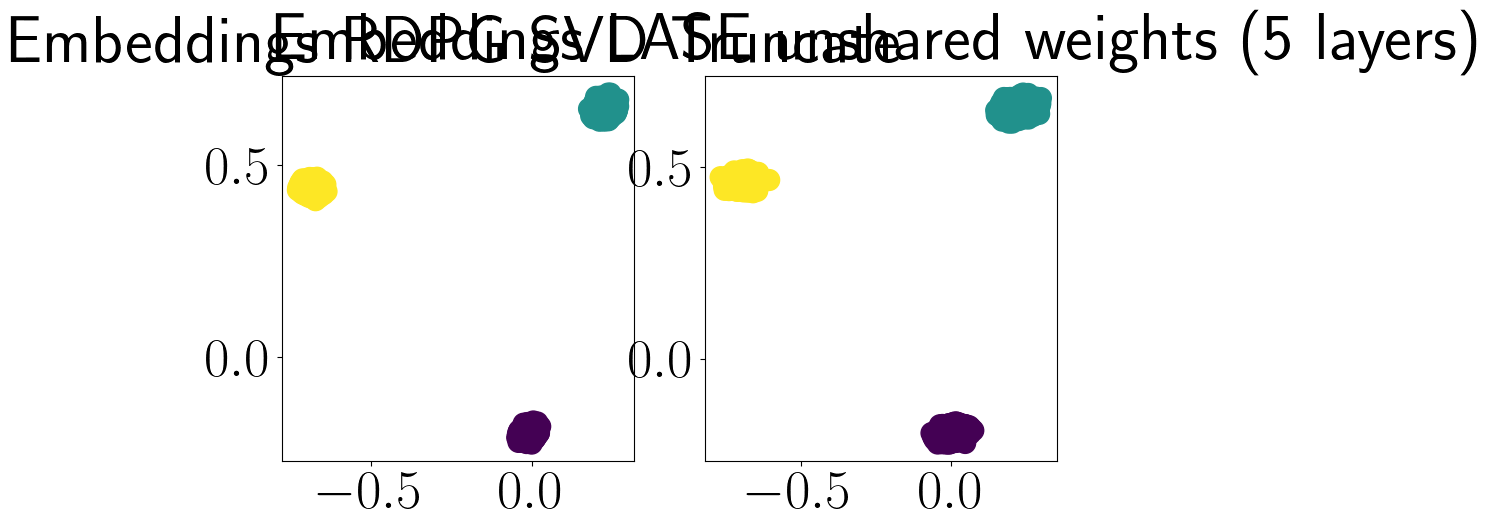

In [5]:
from models.SVD_truncate import align_Xs

x_lase_p = align_Xs(x_lase,x_svd)

fig, axes = plt.subplots(1, 2, figsize =(10,5))
axes[0].set_title('Embeddings RDPG SVD Truncate')
axes[0].scatter(x_svd[:,0],x_svd[:,1], c=colors)
# axes[0].set_xlim([-0.9, 0.5])
# axes[0].set_ylim([-0.9, 0.5])
axes[1].set_title(f'Embeddings LASE unshared weights ({gd_steps} layers)')
axes[1].scatter(x_lase_p[:,0],x_lase_p[:,1], c=colors)
# axes[1].set_xlim([-0.9, 0.5])
# axes[1].set_ylim([-0.9, 0.5])
plt.show()

# SBM-5

Loss LASE shared weights (5 layers):  tensor(4109.8652)
Loss RDPG SVD Truncate:  3812.059


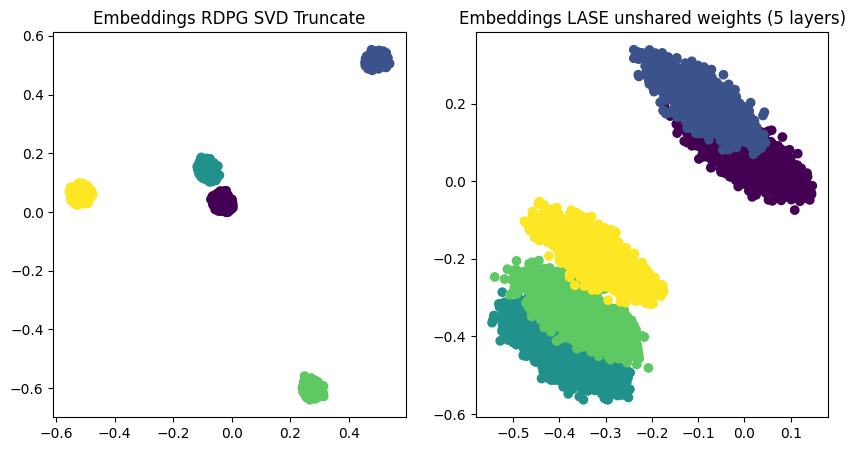

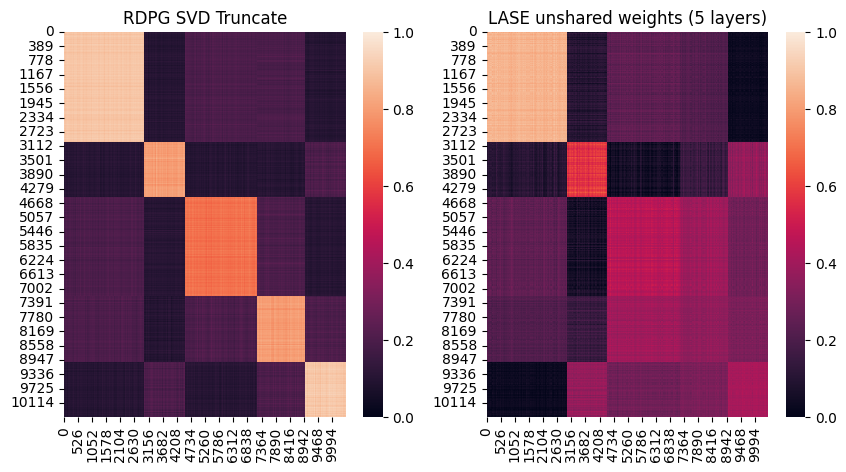

In [2]:
d = 5
gd_steps = 5
device = 'cpu'


lase = LASE(d, d, gd_steps)
lase.load_state_dict(torch.load('../saved_models/lase_unshared_d5_normalized_unbalanced_subgraphs_rand.pt'))
lase.to(device)
lase.eval()

ORIGINAL_GRAPH = '../data/sbm5_unbalanced_positive_original_graph_095.pkl'
with open(ORIGINAL_GRAPH, 'rb') as f:
    data= pickle.load(f)

num_nodes = data.num_nodes
edge_index = data.edge_index
edge_index_2 = torch.ones([num_nodes,num_nodes],).nonzero().t().contiguous().to(device)
mask = (torch.ones([num_nodes,num_nodes],)-torch.eye(num_nodes)).nonzero().t().contiguous().to(device)
# x  = get_x_init(num_nodes, d, 0, math.pi/2, 0, math.pi/2).to(device)
x = torch.rand((num_nodes, d)).to(device)

x_lase = lase(x, edge_index, edge_index_2, mask)
x_lase = x_lase.detach()
loss = torch.norm((x_lase@x_lase.T - to_dense_adj(edge_index).squeeze(0))*to_dense_adj(mask).squeeze(0))
print(f"Loss LASE shared weights ({gd_steps} layers): ", loss)
x_lase = x_lase.to('cpu')

# x_gd, cost_gd, iter = RDPG_GD_Armijo(x, edge_index, mask)
# x_gd = x_gd.to('cpu')
# loss = torch.norm((x_gd@x_gd.T - to_dense_adj(edge_index).squeeze(0))*to_dense_adj(mask).squeeze(0))
# print("Loss RDPG GD Armijo: ", loss)
# print("Armijo iterations: ", iter)

x_svd = embed_scipy(edge_index,d)
loss = np.linalg.norm((x_svd@x_svd.T - to_dense_adj(edge_index).squeeze(0).numpy())*to_dense_adj(mask).squeeze(0))
print("Loss RDPG SVD Truncate: ", loss)

# x_cgd = coordinate_descent(edge_index, mask, d)
# loss = np.linalg.norm((x_cgd@x_cgd.T - to_dense_adj(edge_index).squeeze(0).numpy())*to_dense_adj(mask).squeeze(0))
# print("Loss Coordinate Gradient Descent: ", loss)

n = [3000, 1500, 2700, 1800, 1500]
colors = np.concatenate((np.ones(n[0]),np.ones(n[1])*2,np.ones(n[2])*3,np.ones(n[3])*4,np.ones(n[4])*5))

fig, axes = plt.subplots(1, 2, figsize =(10,5))
axes[0].set_title('Embeddings RDPG SVD Truncate')
axes[0].scatter(x_svd[:,0],x_svd[:,1], c=colors)
# axes[1].set_title(f'Coordinate Gradient Descent')
# axes[1].scatter(x_cgd[:,0],x_cgd[:,1])
# axes[2].set_title('RDPG GD Armijo')
# axes[2].scatter(x_gd[:,0],x_gd[:,1])
axes[1].set_title(f'Embeddings LASE unshared weights ({gd_steps} layers)')
axes[1].scatter(x_lase[:,0],x_lase[:,1], c=colors)
plt.show()

fig, axes = plt.subplots(1, 2, figsize =(10,5))
axes[0].set_title('RDPG SVD Truncate')
sns.heatmap(x_svd@x_svd.T, ax=axes[0], vmin=0.0, vmax=1.0, cbar=True)
# axes[1].set_title(f'Coordinate Gradient Descent')
# sns.heatmap(x_cgd@x_cgd.T, ax=axes[1], vmin=0.0, vmax=1.0, cbar=True)
# axes[2].set_title('RDPG GD Armijo')
# sns.heatmap(x_gd@x_gd.T, ax=axes[2], vmin=0.0, vmax=1.0, cbar=True)
axes[1].set_title(f'LASE unshared weights ({gd_steps} layers)')
sns.heatmap(x_lase@x_lase.T, ax=axes[1], vmin=0.0, vmax=1.0, cbar=True)
plt.show()



In [ ]:
d = 10
gd_steps = 5
device = 'cpu'


lase = LASE(d, d, gd_steps)
lase.load_state_dict(torch.load('../saved_models/lase_unshared_d5_normalized_unbalanced_subgraphs_rand.pt'))
lase.to(device)
lase.eval()

ORIGINAL_GRAPH = '../data/sbm5_unbalanced_positive_original_graph_095.pkl'
with open(ORIGINAL_GRAPH, 'rb') as f:
    data= pickle.load(f)

num_nodes = data.num_nodes
edge_index = data.edge_index
edge_index_2 = torch.ones([num_nodes,num_nodes],).nonzero().t().contiguous().to(device)
mask = (torch.ones([num_nodes,num_nodes],)-torch.eye(num_nodes)).nonzero().t().contiguous().to(device)
# x  = get_x_init(num_nodes, d, 0, math.pi/2, 0, math.pi/2).to(device)
x = torch.rand((num_nodes, d)).to(device)

x_lase = lase(x, edge_index, edge_index_2, mask)
x_lase = x_lase.detach()
loss = torch.norm((x_lase@x_lase.T - to_dense_adj(edge_index).squeeze(0))*to_dense_adj(mask).squeeze(0))
print(f"Loss LASE shared weights ({gd_steps} layers): ", loss)
x_lase = x_lase.to('cpu')

# x_gd, cost_gd, iter = RDPG_GD_Armijo(x, edge_index, mask)
# x_gd = x_gd.to('cpu')
# loss = torch.norm((x_gd@x_gd.T - to_dense_adj(edge_index).squeeze(0))*to_dense_adj(mask).squeeze(0))
# print("Loss RDPG GD Armijo: ", loss)
# print("Armijo iterations: ", iter)

x_svd = embed_scipy(edge_index,d)
loss = np.linalg.norm((x_svd@x_svd.T - to_dense_adj(edge_index).squeeze(0).numpy())*to_dense_adj(mask).squeeze(0))
print("Loss RDPG SVD Truncate: ", loss)

# x_cgd = coordinate_descent(edge_index, mask, d)
# loss = np.linalg.norm((x_cgd@x_cgd.T - to_dense_adj(edge_index).squeeze(0).numpy())*to_dense_adj(mask).squeeze(0))
# print("Loss Coordinate Gradient Descent: ", loss)

n = [3000, 1500, 2700, 1800, 1500]
colors = np.concatenate((np.ones(n[0]),np.ones(n[1])*2,np.ones(n[2])*3,np.ones(n[3])*4,np.ones(n[4])*5))

fig, axes = plt.subplots(1, 2, figsize =(10,5))
axes[0].set_title('Embeddings RDPG SVD Truncate')
axes[0].scatter(x_svd[:,0],x_svd[:,1], c=colors)
# axes[1].set_title(f'Coordinate Gradient Descent')
# axes[1].scatter(x_cgd[:,0],x_cgd[:,1])
# axes[2].set_title('RDPG GD Armijo')
# axes[2].scatter(x_gd[:,0],x_gd[:,1])
axes[1].set_title(f'Embeddings LASE unshared weights ({gd_steps} layers)')
axes[1].scatter(x_lase[:,0],x_lase[:,1], c=colors)
plt.show()

fig, axes = plt.subplots(1, 2, figsize =(10,5))
axes[0].set_title('RDPG SVD Truncate')
sns.heatmap(x_svd@x_svd.T, ax=axes[0], vmin=0.0, vmax=1.0, cbar=True)
# axes[1].set_title(f'Coordinate Gradient Descent')
# sns.heatmap(x_cgd@x_cgd.T, ax=axes[1], vmin=0.0, vmax=1.0, cbar=True)
# axes[2].set_title('RDPG GD Armijo')
# sns.heatmap(x_gd@x_gd.T, ax=axes[2], vmin=0.0, vmax=1.0, cbar=True)
axes[1].set_title(f'LASE unshared weights ({gd_steps} layers)')
sns.heatmap(x_lase@x_lase.T, ax=axes[1], vmin=0.0, vmax=1.0, cbar=True)
plt.show()



Loss LASE shared weights (5 layers):  tensor(4161.3228)
Loss RDPG SVD Truncate:  3812.059


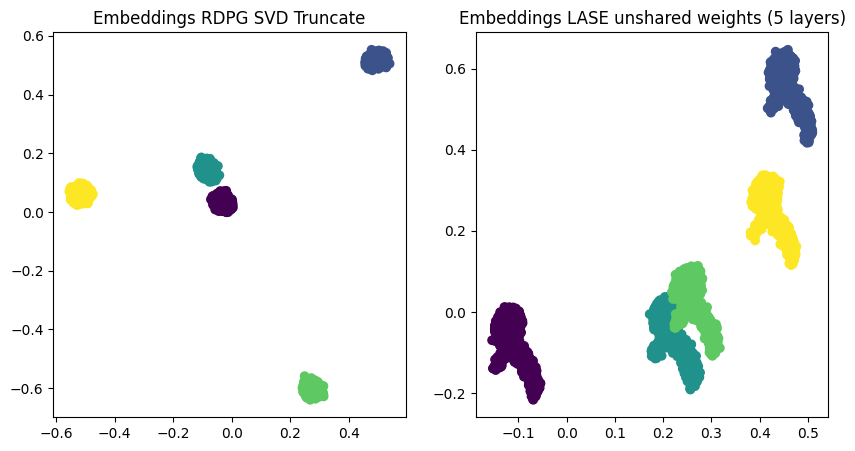

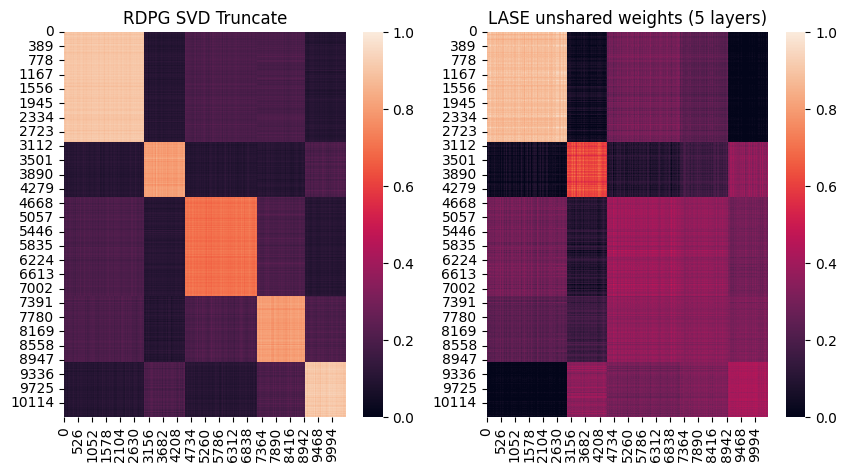

In [3]:
d = 5
gd_steps = 5
device = 'cpu'


lase = LASE(d, d, gd_steps)
lase.load_state_dict(torch.load('../saved_models/lase_unshared_d5_normalized_unbalanced_subgraphs.pt'))
lase.to(device)
lase.eval()

ORIGINAL_GRAPH = '../data/sbm5_unbalanced_positive_original_graph_095.pkl'
with open(ORIGINAL_GRAPH, 'rb') as f:
    data= pickle.load(f)

num_nodes = data.num_nodes
edge_index = data.edge_index
edge_index_2 = torch.ones([num_nodes,num_nodes],).nonzero().t().contiguous().to(device)
mask = (torch.ones([num_nodes,num_nodes],)-torch.eye(num_nodes)).nonzero().t().contiguous().to(device)
x  = get_x_init(num_nodes, d, 0, math.pi/2, 0, math.pi/2).to(device)

x_lase = lase(x, edge_index, edge_index_2, mask)
x_lase = x_lase.detach()
loss = torch.norm((x_lase@x_lase.T - to_dense_adj(edge_index).squeeze(0))*to_dense_adj(mask).squeeze(0))
print(f"Loss LASE shared weights ({gd_steps} layers): ", loss)
x_lase = x_lase.to('cpu')

# x_gd, cost_gd, iter = RDPG_GD_Armijo(x, edge_index, mask)
# x_gd = x_gd.to('cpu')
# loss = torch.norm((x_gd@x_gd.T - to_dense_adj(edge_index).squeeze(0))*to_dense_adj(mask).squeeze(0))
# print("Loss RDPG GD Armijo: ", loss)
# print("Armijo iterations: ", iter)

x_svd = embed_scipy(edge_index,d)
loss = np.linalg.norm((x_svd@x_svd.T - to_dense_adj(edge_index).squeeze(0).numpy())*to_dense_adj(mask).squeeze(0))
print("Loss RDPG SVD Truncate: ", loss)

# x_cgd = coordinate_descent(edge_index, mask, d)
# loss = np.linalg.norm((x_cgd@x_cgd.T - to_dense_adj(edge_index).squeeze(0).numpy())*to_dense_adj(mask).squeeze(0))
# print("Loss Coordinate Gradient Descent: ", loss)

n = [3000, 1500, 2700, 1800, 1500]
colors = np.concatenate((np.ones(n[0]),np.ones(n[1])*2,np.ones(n[2])*3,np.ones(n[3])*4,np.ones(n[4])*5))

fig, axes = plt.subplots(1, 2, figsize =(10,5))
axes[0].set_title('Embeddings RDPG SVD Truncate')
axes[0].scatter(x_svd[:,0],x_svd[:,1], c=colors)
# axes[1].set_title(f'Coordinate Gradient Descent')
# axes[1].scatter(x_cgd[:,0],x_cgd[:,1])
# axes[2].set_title('RDPG GD Armijo')
# axes[2].scatter(x_gd[:,0],x_gd[:,1])
axes[1].set_title(f'Embeddings LASE unshared weights ({gd_steps} layers)')
axes[1].scatter(x_lase[:,0],x_lase[:,1], c=colors)
plt.show()

fig, axes = plt.subplots(1, 2, figsize =(10,5))
axes[0].set_title('RDPG SVD Truncate')
sns.heatmap(x_svd@x_svd.T, ax=axes[0], vmin=0.0, vmax=1.0, cbar=True)
# axes[1].set_title(f'Coordinate Gradient Descent')
# sns.heatmap(x_cgd@x_cgd.T, ax=axes[1], vmin=0.0, vmax=1.0, cbar=True)
# axes[2].set_title('RDPG GD Armijo')
# sns.heatmap(x_gd@x_gd.T, ax=axes[2], vmin=0.0, vmax=1.0, cbar=True)
axes[1].set_title(f'LASE unshared weights ({gd_steps} layers)')
sns.heatmap(x_lase@x_lase.T, ax=axes[1], vmin=0.0, vmax=1.0, cbar=True)
plt.show()



Loss LASE shared weights (10 layers):  tensor(4120.2422)
Loss RDPG SVD Truncate:  3812.0593


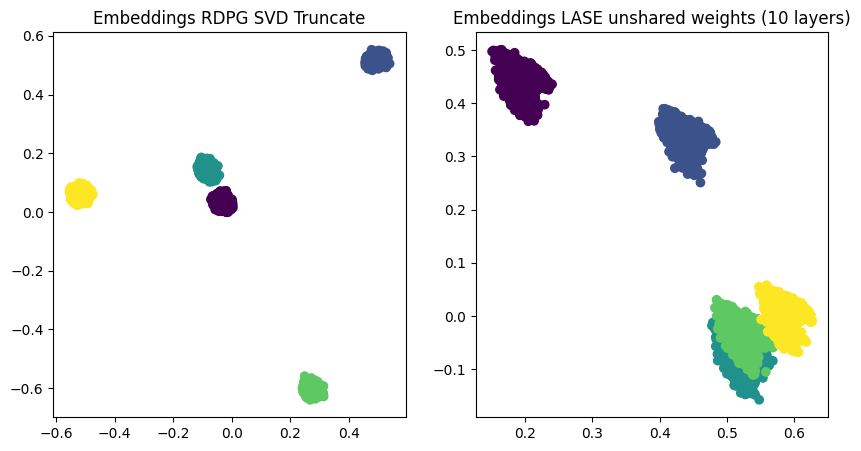

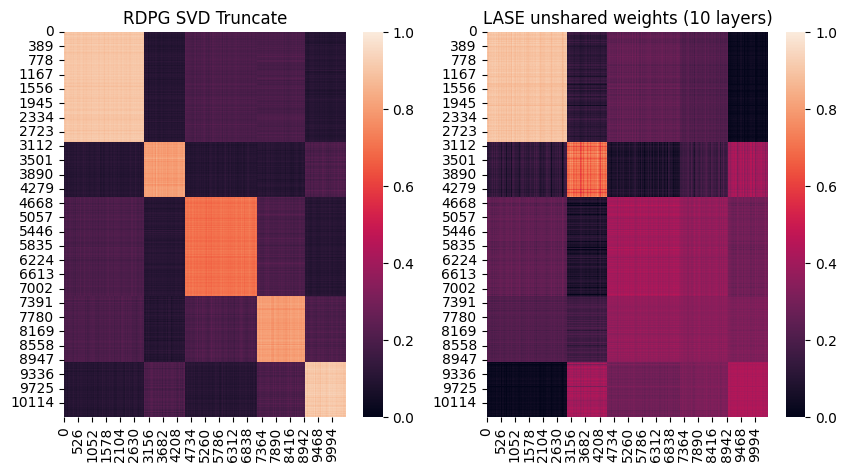

In [2]:
d = 5
gd_steps = 10
device = 'cpu'


lase = LASE(d, d, gd_steps)
lase.load_state_dict(torch.load('../saved_models/lase_unshared_d5_normalized_unbalanced_subgraphs_10steps.pt'))
lase.to(device)
lase.eval()

ORIGINAL_GRAPH = '../data/sbm5_unbalanced_positive_original_graph_095.pkl'
with open(ORIGINAL_GRAPH, 'rb') as f:
    data= pickle.load(f)

num_nodes = data.num_nodes
edge_index = data.edge_index
edge_index_2 = torch.ones([num_nodes,num_nodes],).nonzero().t().contiguous().to(device)
mask = (torch.ones([num_nodes,num_nodes],)-torch.eye(num_nodes)).nonzero().t().contiguous().to(device)
x  = get_x_init(num_nodes, d, 0, math.pi/2, 0, math.pi/2).to(device)

x_lase = lase(x, edge_index, edge_index_2, mask)
x_lase = x_lase.detach()
loss = torch.norm((x_lase@x_lase.T - to_dense_adj(edge_index).squeeze(0))*to_dense_adj(mask).squeeze(0))
print(f"Loss LASE shared weights ({gd_steps} layers): ", loss)
x_lase = x_lase.to('cpu')

# x_gd, cost_gd, iter = RDPG_GD_Armijo(x, edge_index, mask)
# x_gd = x_gd.to('cpu')
# loss = torch.norm((x_gd@x_gd.T - to_dense_adj(edge_index).squeeze(0))*to_dense_adj(mask).squeeze(0))
# print("Loss RDPG GD Armijo: ", loss)
# print("Armijo iterations: ", iter)

x_svd = embed_scipy(edge_index,d)
loss = np.linalg.norm((x_svd@x_svd.T - to_dense_adj(edge_index).squeeze(0).numpy())*to_dense_adj(mask).squeeze(0))
print("Loss RDPG SVD Truncate: ", loss)

# x_cgd = coordinate_descent(edge_index, mask, d)
# loss = np.linalg.norm((x_cgd@x_cgd.T - to_dense_adj(edge_index).squeeze(0).numpy())*to_dense_adj(mask).squeeze(0))
# print("Loss Coordinate Gradient Descent: ", loss)

n = [3000, 1500, 2700, 1800, 1500]
colors = np.concatenate((np.ones(n[0]),np.ones(n[1])*2,np.ones(n[2])*3,np.ones(n[3])*4,np.ones(n[4])*5))

fig, axes = plt.subplots(1, 2, figsize =(10,5))
axes[0].set_title('Embeddings RDPG SVD Truncate')
axes[0].scatter(x_svd[:,0],x_svd[:,1], c=colors)
# axes[1].set_title(f'Coordinate Gradient Descent')
# axes[1].scatter(x_cgd[:,0],x_cgd[:,1])
# axes[2].set_title('RDPG GD Armijo')
# axes[2].scatter(x_gd[:,0],x_gd[:,1])
axes[1].set_title(f'Embeddings LASE unshared weights ({gd_steps} layers)')
axes[1].scatter(x_lase[:,0],x_lase[:,1], c=colors)
plt.show()

fig, axes = plt.subplots(1, 2, figsize =(10,5))
axes[0].set_title('RDPG SVD Truncate')
sns.heatmap(x_svd@x_svd.T, ax=axes[0], vmin=0.0, vmax=1.0, cbar=True)
# axes[1].set_title(f'Coordinate Gradient Descent')
# sns.heatmap(x_cgd@x_cgd.T, ax=axes[1], vmin=0.0, vmax=1.0, cbar=True)
# axes[2].set_title('RDPG GD Armijo')
# sns.heatmap(x_gd@x_gd.T, ax=axes[2], vmin=0.0, vmax=1.0, cbar=True)
axes[1].set_title(f'LASE unshared weights ({gd_steps} layers)')
sns.heatmap(x_lase@x_lase.T, ax=axes[1], vmin=0.0, vmax=1.0, cbar=True)
plt.show()